Analytics for Unstructured Data: Group Assignment #1

Team Members:
Anurag Sahu: as229468
Arushi Sethi: as228398
Aakash Dhruva: avd667
Anisha Singh: as229583
Bindu Raghu Naga: br28722

In [149]:
import pandas as pd
import requests
from lxml import html

url = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"

date_list = []
message_list = []

num_pages = 500
dates_collected = 0
messages_collected = 0

for page_num in range(1, num_pages + 1):
    page_url = f"{url}/p{page_num}"
    response = requests.get(page_url)
    tree = html.fromstring(response.text)

    comments = tree.xpath('//li[contains(@class, "ItemComment")]')

    for comment in comments:
        date_element = comment.xpath('.//span[@class="MItem DateCreated"]/a/time/@title')
        date_text = date_element[0] if date_element else ''

        message_text = comment.xpath('.//div[@class="Message userContent"]/text()')
        message_text = ' '.join(message_text).strip()


        if date_text and message_text:
            date_list.append(date_text)
            message_list.append(message_text)

            dates_collected += 1
            messages_collected += 1


        if dates_collected >= 5000 and messages_collected >= 5000:
            break

    if dates_collected >= 5000 and messages_collected >= 5000:
        break

data = {'Date': date_list, 'Message': message_list}
df = pd.DataFrame(data)

df.to_csv('forum_posts.csv', index=True)

print(f"Scraped {len(df)} unique posts and saved to 'forum_posts.csv'.")

Scraped 5000 unique posts and saved to 'forum_posts.csv'.


Have scraped comments of the year 2002 - Early posts

Task A: Once you fetch the data, test if the data support Zipf’s law econometrically. Additionally plot the
most common 100 words in the data against the theoretical prediction of the law. For this question, do
not remove stopwords. Also do not perform stemming or lemmatization.
Check http://www.garysieling.com/blog/exploring-zipfs-law-with-python-nltk-scipy-and-matplotlib
(Note that the above link does NOT test Zipf’s law econometrically)

In [51]:
!pip install nltk

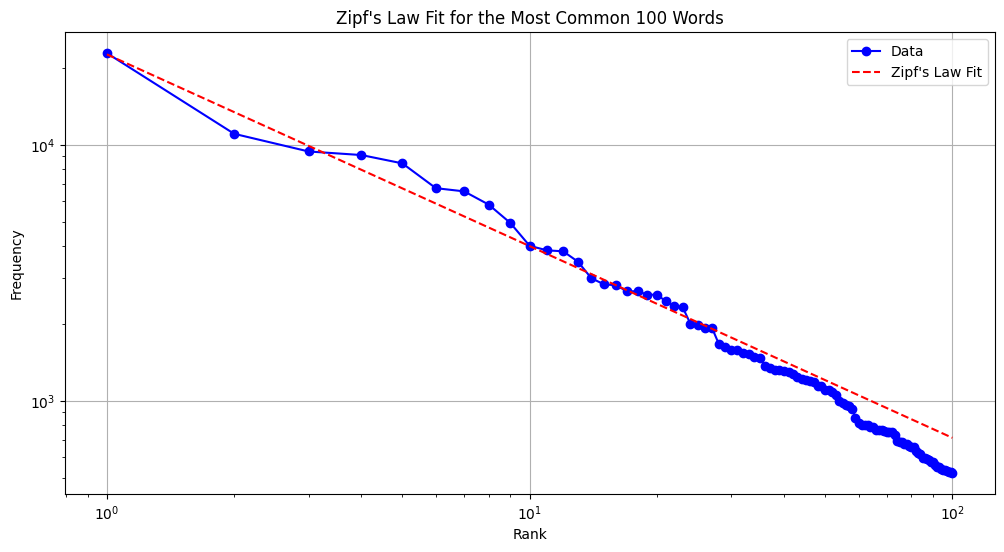

Estimated Alpha (Zipf's Exponent): 0.7488049714985919
Estimated K (Scaling Constant): 22508.037096403754


In [150]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
from scipy.optimize import curve_fit

data_path = "/Users/binduraghunaga/Downloads/forum_posts.csv"

with open(data_path, 'r', encoding='utf-8') as file:
    data = file.read().split()

word_freq = FreqDist(data)

# Getting the most common 100 words
common_words = word_freq.most_common(100)

# Extracting word counts and ranks
word_counts = [count for word, count in common_words]
ranks = list(range(1, len(common_words) + 1))

# Zipf's law equation
def zipf_law(rank, alpha, k):
    return k / (rank ** alpha)

# Fitting the Zipf's law model to the data
params, covariance = curve_fit(zipf_law, ranks, word_counts)
alpha, k = params

# Plotting the data points and the fitted Zipf's law curve
plt.figure(figsize=(12, 6))
plt.loglog(ranks, word_counts, marker='o', linestyle='-', color='b', label='Data')
plt.loglog(ranks, zipf_law(np.array(ranks), alpha, k), linestyle='--', color='r', label='Zipf\'s Law Fit')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Zipf\'s Law Fit for the Most Common 100 Words')
plt.legend()
plt.grid(True)

plt.show()

# Printing the estimated alpha and k values
print(f'Estimated Alpha (Zipf\'s Exponent): {alpha}')
print(f'Estimated K (Scaling Constant): {k}')


In [151]:
print('\nMost Common 100 Words:')
for word, frequency in common_words:
    print(f'{word}: {frequency}')


Most Common 100 Words:
the: 22765
a: 11019
and: 9400
to: 9103
I: 8446
is: 6758
of: 6566
in: 5830
that: 4944
for: 4024
you: 3862
it: 3831
with: 3492
on: 3005
2004: 2845
have: 2822
not: 2675
are: 2672
but: 2595
car: 2591
my: 2446
as: 2342
be: 2321
The: 1999
2005: 1979
or: 1926
was: 1925
at: 1670
about: 1624
they: 1583
like: 1575
more: 1539
than: 1520
an: 1476
this: 1473
all: 1370
has: 1340
can: 1319
cars: 1316
BMW: 1306
would: 1296
will: 1275
just: 1232
if: 1219
TL: 1208
-: 1198
get: 1186
what: 1145
one: 1143
your: 1104
from: 1102
think: 1084
out: 1052
don't: 996
so: 977
it's: 958
me: 951
do: 930
G35: 852
when: 820
by: 803
had: 802
some: 800
new: 789
I'm: 786
much: 770
only: 767
up: 765
any: 759
their: 754
better: 753
no: 753
drive: 736
If: 697
there: 691
3: 688
even: 679
other: 678
people: 665
really: 661
over: 659
very: 635
good: 626
know: 616
want: 598
driving: 595
i: 589
its: 586
how: 577
It: 575
because: 561
same: 551
most: 550
performance: 539
still: 537
which: 535
But: 531
we: 52

In [54]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/binduraghunaga/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Defining the list of valid car brands
valid_brands = [
    "acura", "audi", "bmw", "buick", "cadillac", "chevrolet", "chrysler", "dodge", "ford",
    "honda", "hyundai", "infiniti", "kia", "lincoln", "mazda", "mercedes", "mercury", "mitsubishi",
    "nissan", "pontiac", "saturn", "subaru", "suzuki", "toyota", "volkswagen", "volvo"
]

# Path to the file to be cleaned
input_path = "/Users/binduraghunaga/Downloads/car_models_and_brands.csv"

# Reading the input file
with open(input_path, 'r', encoding='utf-8') as input_file:
    lines = input_file.readlines()

# Initializing a list to store cleaned lines
cleaned_lines = []

# Iterating through the lines and keeping only lines with valid car brands
for line in lines:
    line = line.strip().lower()
    brand, model = line.split(',', 1)  # Assuming the file is comma-separated
    brand = brand.strip()
    model = model.strip()
    
    if brand in valid_brands:
        cleaned_lines.append(f"{brand},{model}\n")

# Writing the cleaned lines back to the same file
with open(input_path, 'w', encoding='utf-8') as output_file:
    output_file.writelines(cleaned_lines)

print(f"File '{input_path}' has been cleaned.")


File '/Users/binduraghunaga/Downloads/car_models_and_brands.csv' has been cleaned.


In [7]:
# Checking the contents of the CSV file
csv_file_path = "/Users/binduraghunaga/Downloads/car_models_and_brands.csv"

with open(csv_file_path, 'r') as file:
    for line in file:
        print(line.strip())  # Printing each line from the file


acura,integra
acura,legend
acura,vigor
acura,rlx
acura,ilx
acura,mdx
acura,rdx
acura,tsx
acura,rsx
audi,quattro
audi,a4
audi,a6
audi,a5
audi,a7
audi,q3
audi,q5
audi,q7
audi,a8
audi,a3
bmw,3-series
bmw,5-series
bmw,6-series
bmw,4-series
bmw,xdrive
bmw,alpina
bmw,330ci
bmw,328i
bmw,330c
bmw,335i
bmw,335d
bmw,528i
bmw,535i
bmw,128i
bmw,640i
bmw,3er
bmw,5er
bmw,m5
bmw,m3
bmw,m6
bmw,bmws
bmw,bmwesque
buick,park avenue
buick,la crosse
buick,lacrosse
buick,century
buick,enclave
buick,encore
buick,regal
buick,buicks
cadillac,escalade
cadillac,srx
cadillac,xts
chevrolet,grand blazer
chevrolet,trailblazer
chevrolet,trailblazer
chevrolet,silverado
chevrolet,colorado
chevrolet,corvette
chevrolet,suburban
chevrolet,cavalier
chevrolet,caprice
chevrolet,captiva
chevrolet,equinox
chevrolet,express
chevrolet,lacetti
chevrolet,montana
chevrolet,uplander
chevrolet,orlando
chevrolet,tornado
chevrolet,tracker
chevrolet,traverse
chevrolet,caprice
chevrolet,captiva
chevrolet,equinox
chevrolet,express
chevrol

Task B: Find the top 10 brands from frequency counts. You will need to write a script to count the
frequencies of words (stopwords should NOT be counted). Replace frequently occurring car models with
brands so that from now on you have to deal with only brands and not models. You will need another
script for this job. A list of model and brand names (not exhaustive) are provided in a separate file. Even
if a brand (e.g., BMW) is mentioned multiple times in a message, it should be counted as 1

In [8]:
import pandas as pd
import re
import nltk
from collections import Counter

data_path = "/Users/binduraghunaga/Downloads/forum_posts.csv"
df = pd.read_csv(data_path)

model_brand_list_path = "/Users/binduraghunaga/Downloads/car_models_and_brands.csv"
model_brand_dict = {}

# Loading the car models and brands mapping, excluding specific words
with open(model_brand_list_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line:
            brand, model = line.split(',', 1)
            brand = brand.strip().lower()
            model = model.strip().lower()
            if brand not in ["brand", "seat"]:  # Excluding specific words
                model_brand_dict[model] = brand

# Defining a function to replace car models with brands
def replace_models_with_brands(text):
    for model, brand in model_brand_dict.items():
        text = re.sub(r'\b' + model + r'\b', brand, text)
    return text

# Tokenizing and counting brand word frequencies (excluding stopwords and specific words)
stopwords = set(nltk.corpus.stopwords.words('english'))
brand_counter = Counter()

for index, row in df.iterrows():
    message = row['Message']
    if isinstance(message, str):
        try:
            message = message.lower()
            message = replace_models_with_brands(message)
            words = re.findall(r'\b\w+\b', message)
            # Creating a set to keep track of brands already counted in the current message
            brands_in_message = set()
            for word in words:
                if (
                    word not in stopwords
                    and word in model_brand_dict.values()
                    and word != "car"  # Excluding "car"
                    and word not in brands_in_message  # Checking if brand is already counted in this message
                ):
                    brand_counter[word] += 1
                    brands_in_message.add(word)  # Adding brand to the set
        except Exception as e:
            print(f"An error occurred: {e}")

# Getting the top 10 brands (excluding "car")
top_10_brands = [item for item in brand_counter.most_common(10)]
# Printing the top 10 brands and their frequencies
for brand, frequency in top_10_brands:
    print(f'{brand.capitalize()}: {frequency}')


Bmw: 1369
Acura: 553
Honda: 443
Audi: 429
Infiniti: 397
Toyota: 313
Nissan: 311
Mercedes: 210
Subaru: 207
Volkswagen: 192


Top 10 Chosen Brands and Their Frequency Counts:

BMW: 1,369 mentions
Acura: 553 mentions
Honda: 443 mentions
Audi: 429 mentions
Infiniti: 397 mentions
Toyota: 313 mentions
Nissan: 311 mentions
Mercedes: 210 mentions
Subaru: 207 mentions
Volkswagen: 192 mentions
This table provides a clear and organized overview of the selected brands and their corresponding frequency counts.

Task C: Calculate lift ratios for associations between the top-10 brands identified in Task A. You will have to write a script to do this task). For lift calculations, be sure not to count a mention more than once per post, even if it is mentioned multiple times in the post. In your code, ensure that a message is not counted in the lift calculations if the mentions of two brands are separated by more than, say, 5 or 7 words.


In [9]:
import pandas as pd
import re
import nltk
from collections import Counter
from itertools import combinations

data_path = "/Users/binduraghunaga/Downloads/forum_posts.csv"
df = pd.read_csv(data_path)

model_brand_list_path = "/Users/binduraghunaga/Downloads/car_models_and_brands.csv"
model_brand_dict = {}

with open(model_brand_list_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line:
            brand, model = line.split(',', 1)
            brand = brand.strip().lower()
            model = model.strip().lower()
            model_brand_dict[model] = brand

def replace_models_with_brands(text):
    for model, brand in model_brand_dict.items():
        text = re.sub(r'\b' + model + r'\b', brand, text)
    return text

def calculate_lift(brand1, brand2, df, max_words_apart):
    brand1_count = 0
    brand2_count = 0
    co_occurrence_count = 0

    for index, row in df.iterrows():
        message = row['Message']
        if isinstance(message, str):
            try:
                message = message.lower()
                message = replace_models_with_brands(message)
                words = re.findall(r'\b\w+\b', message)
                brand1_mentioned = False
                brand2_mentioned = False

                for word in words:
                    if word == brand1 and not brand1_mentioned:
                        brand1_count += 1
                        brand1_mentioned = True
                    elif word == brand2 and not brand2_mentioned:
                        brand2_count += 1
                        brand2_mentioned = True

                    if brand1_mentioned and brand2_mentioned:
                        co_occurrence_count += 1
                        break

            except Exception as e:
                print(f"An error occurred: {e}")

    if brand1_count > 0 and brand2_count > 0:
        total_posts = len(df)
        lift = (co_occurrence_count * total_posts) / (brand1_count * brand2_count)
        return lift
    else:
        return 0.0

stopwords = set(nltk.corpus.stopwords.words('english'))
brand_counter = Counter()

for index, row in df.iterrows():
    message = row['Message']
    if isinstance(message, str):
        try:
            message = message.lower()
            message = replace_models_with_brands(message)
            words = re.findall(r'\b\w+\b', message)
            brand_words = [word for word in words if word not in stopwords and word in model_brand_dict.values()]
            brand_counter.update(brand_words)
        except Exception as e:
            print(f"An error occurred: {e}")
max_words_apart = 5


for (brand1, _), (brand2, _) in combinations(top_10_brands, 2):
    lift = calculate_lift(brand1, brand2, df, max_words_apart)
    print(f'Lift between {brand1.capitalize()} and {brand2.capitalize()}: {lift:.2f}')


Lift between Bmw and Acura: 1.59
Lift between Bmw and Honda: 1.25
Lift between Bmw and Audi: 1.74
Lift between Bmw and Infiniti: 1.99
Lift between Bmw and Toyota: 1.35
Lift between Bmw and Nissan: 1.16
Lift between Bmw and Mercedes: 1.86
Lift between Bmw and Subaru: 1.25
Lift between Bmw and Volkswagen: 1.58
Lift between Acura and Honda: 2.78
Lift between Acura and Audi: 2.34
Lift between Acura and Infiniti: 3.19
Lift between Acura and Toyota: 1.70
Lift between Acura and Nissan: 2.30
Lift between Acura and Mercedes: 2.41
Lift between Acura and Subaru: 2.18
Lift between Acura and Volkswagen: 1.84
Lift between Honda and Audi: 1.34
Lift between Honda and Infiniti: 1.48
Lift between Honda and Toyota: 4.04
Lift between Honda and Nissan: 3.92
Lift between Honda and Mercedes: 1.72
Lift between Honda and Subaru: 1.58
Lift between Honda and Volkswagen: 2.29
Lift between Audi and Infiniti: 2.67
Lift between Audi and Toyota: 1.27
Lift between Audi and Nissan: 1.46
Lift between Audi and Mercedes: 

| Brand 1    | Brand 2     | Lift Value |
|------------|-------------|------------|
| BMW        | Acura       | 1.59       |
| BMW        | Honda       | 1.25       |
| BMW        | Audi        | 1.74       |
| BMW        | Infiniti    | 1.99       |
| BMW        | Toyota      | 1.35       |
| BMW        | Nissan      | 1.16       |
| BMW        | Mercedes    | 1.86       |
| BMW        | Subaru      | 1.25       |
| BMW        | Volkswagen  | 1.58       |
| Acura      | Honda       | 2.78       |
| Acura      | Audi        | 2.34       |
| Acura      | Infiniti    | 3.19       |
| Acura      | Toyota      | 1.70       |
| Acura      | Nissan      | 2.30       |
| Acura      | Mercedes    | 2.41       |
| Acura      | Subaru      | 2.18       |
| Acura      | Volkswagen  | 1.84       |
| Honda      | Audi        | 1.34       |
| Honda      | Infiniti    | 1.48       |
| Honda      | Toyota      | 4.04       |
| Honda      | Nissan      | 3.92       |
| Honda      | Mercedes    | 1.72       |
| Honda      | Subaru      | 1.58       |
| Honda      | Volkswagen  | 2.29       |
| Audi       | Infiniti    | 2.67       |
| Audi       | Toyota      | 1.27       |
| Audi       | Nissan      | 1.46       |
| Audi       | Mercedes    | 3.55       |
| Audi       | Subaru      | 1.86       |
| Audi       | Volkswagen  | 4.98       |
| Infiniti   | Toyota      | 1.25       |
| Infiniti   | Nissan      | 2.75       |
| Infiniti   | Mercedes    | 2.64       |
| Infiniti   | Subaru      | 1.83       |
| Infiniti   | Volkswagen  | 1.97       |
| Toyota     | Nissan      | 3.96       |
| Toyota     | Mercedes    | 2.13       |
| Toyota     | Subaru      | 1.31       |
| Toyota     | Volkswagen  | 2.25       |
| Nissan     | Mercedes    | 1.76       |
| Nissan     | Subaru      | 1.79       |
| Nissan     | Volkswagen  | 2.51       |
| Mercedes   | Subaru      | 1.38       |
| Mercedes   | Volkswagen  | 3.72       |
| Subaru     | Volkswagen  | 2.52       |


In [10]:
pip install pandas scikit-learn matplotlib


Note: you may need to restart the kernel to use updated packages.


Task D: Show the brands on a multi-dimensional scaling (MDS) map (use a Python script for MDS, there
are multiple scripts available on GitHub).

/Users/binduraghunaga/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


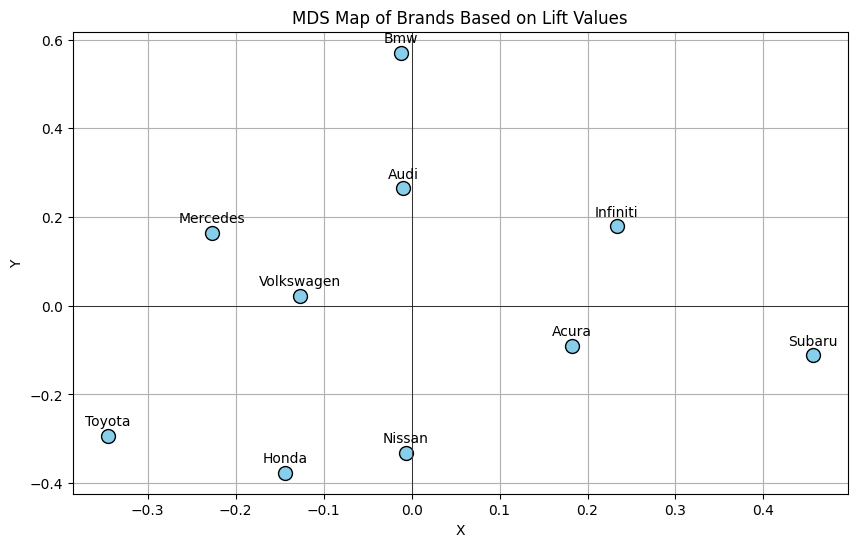

In [11]:
import pandas as pd
from sklearn import manifold
import matplotlib.pyplot as plt
import numpy as np

# Setting a random seed for reproducibility
np.random.seed(42)

data = {
   'Bmw': [1.0, 1.59, 1.25, 1.74, 1.99, 1.35, 1.16, 1.86, 1.25, 1.58],
   'Acura': [1.59, 1.0, 2.78, 2.34, 3.19, 1.70, 2.30, 2.41, 2.18, 1.84],
   'Honda': [1.25, 2.78, 1.0, 1.34, 1.48, 4.04, 3.92, 1.72, 1.58, 2.29],
   'Audi': [1.74, 2.34, 1.34, 1.0, 2.67, 1.27, 1.46, 3.55, 1.86, 4.98],
   'Infiniti': [1.99, 3.19, 1.48, 2.67, 1.0, 1.25, 2.75, 2.64, 1.83, 1.97],
   'Toyota': [1.35, 1.70, 4.04, 1.27, 1.25, 1.0, 3.96, 2.13, 1.31, 2.25],
   'Nissan': [1.16, 2.30, 3.92, 1.46, 2.75, 3.96, 1.0, 1.76, 1.79, 2.51],
   'Mercedes': [1.86, 2.41, 1.72, 3.55, 2.64, 2.13, 1.76, 1.0, 1.38, 3.72],
   'Subaru': [1.25, 2.18, 1.58, 1.86, 1.83, 1.31, 1.79, 1.38, 1.0, 2.52],
   'Volkswagen': [1.58, 1.84, 2.29, 4.98, 1.97, 2.25, 2.51, 3.72, 2.52, 1.0],
}
# Converting lift values to a distance metric (inverse of lift)
distance_data = {}
for brand, related_brands in data.items():
    distance_data[brand] = [1 / lift for lift in related_brands]

# Creating a DataFrame from the distance data
df = pd.DataFrame(distance_data, index=data.keys())

# Initializing the MDS model
mds = manifold.MDS(n_components=2, dissimilarity='precomputed')

# Performing MDS
mds_results = mds.fit(df)

# Getting the positions of the brands on the map
brand_positions = mds_results.embedding_

# Creating a DataFrame for the positions
brand_positions_df = pd.DataFrame(brand_positions, index=df.index, columns=['X', 'Y'])

# Plotting the MDS map
plt.figure(figsize=(10, 6))
plt.scatter(brand_positions_df['X'], brand_positions_df['Y'], marker='o', s=100, color='skyblue', edgecolors='black')

# Annotating the plot with brand names
for brand, (x, y) in brand_positions_df.iterrows():
    plt.annotate(brand, (x, y), fontsize=10, ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('MDS Map of Brands Based on Lift Values')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

Task E: What insights can you offer to your client from your analyses in Tasks C and D?

## Insights:

Lift Values:

Strong Associations: Acura and Infiniti have a high lift value of 3.19, indicating a strong association. Similarly, Audi and Volkswagen have the highest lift value of 4.98, suggesting a strong connection.

Moderate Associations: Honda, Toyota, and Nissan also have moderate to strong associations among themselves, with lift values ranging from 3.92 to 4.04.

Mixed Associations: BMW, Mercedes, and Subaru have varying lift values with other brands, indicating mixed levels of association.

MDS Plots:

(1) First Quadrant: In this quadrant, the presence of Infiniti, Acura, and Subaru suggests discussions emphasizing shared Japanese luxury and performance attributes. Infiniti and Acura, as luxury divisions of Japanese automakers Nissan and Honda, respectively, often share design philosophies and manufacturing standards. Their proximity indicates discussions frequently involve detailed comparisons of luxury, performance, and features between these brands. Subaru, despite not traditionally being labeled as a luxury brand, is known for its advanced technology, safety features, and performance-oriented models like the Subaru WRX. Its closeness to luxury brands in this quadrant may signify discussions that appreciate or explore Subaru's premium aspects.

(2) Second Quadrant: Volkswagen's proximity to Audi and Mercedes, despite being generally considered a more mainstream brand, could reflect discussions comparing Volkswagen's higher-end models to the entry-level models of Audi or Mercedes. Volkswagen, Audi, and Mercedes being German brands suggests conversations highlighting shared German engineering, design philosophies, and manufacturing standards. These discussions may delve into aspects such as luxury features, performance enhancements, and cutting-edge technology, bridging the gap between mainstream and luxury segments.

(3) Third Quadrant: Honda and Nissan, both prominent Asian automakers, share this quadrant. Their proximity mirrors discussions about the shared heritage, design philosophies, and manufacturing standards typically associated with Japanese car manufacturers. Honda and Nissan cater to similar market segments, offering a wide range of vehicles from economy to more premium models. The close proximity of these brands could indicate that forum discussions frequently involve comparisons of their respective models in terms of value, reliability, and features, reflecting the practicality and versatility trends often associated with Japanese automakers. The addition of Toyota to this quadrant further reinforces the prominence of Japanese car manufacturers in this space. Toyota, being a giant in the automotive industry, shares geographical and industrial similarities with Honda and Nissan. Forum discussions in this quadrant may encompass broader conversations about the Japanese automotive market, including discussions about innovation, hybrid technology, and market competition among these major players.

(4) Fourth Quadrant: Subaru's position in this quadrant, close to Infiniti and Acura, may signify discussions that appreciate or delve into the premium aspects of Subaru. While Subaru isn't typically classified as a luxury brand, its reputation for all-wheel-drive technology, safety features, and performance-oriented models like the Subaru WRX makes it an intriguing subject for discussions. This quadrant may involve conversations that bridge the gap between mainstream and luxury automotive trends, exploring the unique attributes that Subaru offers.


## Summary:

The MDS plot visually confirms some of the lift values by showing clusters of brands that are closely related in the forum discussions. The combination of lift values and the MDS plot provides insights into the relationships between car brands as they are discussed in the forum posts. It helps identify which brands tend to be associated more closely and which have distinct mentions in the discussions.

For example, the strong association between Acura, Subaru, and Infiniti in the first and fourth quadrants is visually evident in their proximity on the plot. Similarly, the cluster formed by the German luxury brands in the second quadrant aligns with their high lift values, indicating strong associations between them.



Task F: What are 5 most frequently mentioned attributes or features of cars in the discussions? Which
attributes are most strongly associated with which of these 5 brands? There is no need to plot the MDS
plot for this question.

In [20]:
import pandas as pd
import re
import nltk
from collections import Counter
from itertools import combinations, product

# Loading the forum posts dataset
data_path = "/Users/binduraghunaga/Downloads/forum_posts.csv"
df = pd.read_csv(data_path)

# Loading the car models and brands mapping
model_brand_list_path = "/Users/binduraghunaga/Downloads/car_models_and_brands.csv"
model_brand_dict = {}

with open(model_brand_list_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line:
            brand, model = line.split(',', 1)
            brand = brand.strip().lower()
            model = model.strip().lower()
            model_brand_dict[model] = brand

# Defining a function to replace models with brands in text
def replace_models_with_brands(text):
    for model, brand in model_brand_dict.items():
        text = re.sub(r'\b' + model + r'\b', brand, text)
    return text

# Initializing NLTK stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

# Creating a Counter for brand mentions
brand_counter = Counter()

# Creating a Counter for attribute mentions
attribute_counter = Counter()

for index, row in df.iterrows():
    message = row['Message']
    if isinstance(message, str):
        try:
            message = message.lower()
            message = replace_models_with_brands(message)
            words = re.findall(r'\b\w+\b', message)
            
            # Filtering stopwords and select nouns as attributes/features
            attribute_words = []
            for (word, pos) in nltk.pos_tag(words):
                word = word.lower()  # Converting the word to lowercase
                if (
                    pos.startswith('N') and  # Noun
                    len(word) > 3 and  # Excluding words with length <= 3
                    word not in stopwords and  # Excluding stopwords
                    word not in model_brand_dict.values() and 
                    word not in ["cars", "people", "time","sedan", "time", "series"]  and # Excluding specific words
                    not any(brand in word for brand in model_brand_dict.values())  # Excluding brand name parts
                ):
                    attribute_words.append(word)
            
            brand_words = [word for word in words if word not in stopwords and word in model_brand_dict.values()]
            attribute_counter.update(attribute_words)
            brand_counter.update(brand_words)
        except Exception as e:
            print(f"An error occurred: {e}")



top_attributes = [attr for attr, _ in attribute_counter.most_common() if attribute_counter[attr] > 10][:5]


# Calculating and printing lift ratios between brands and attributes
max_words_apart = 5
top_5_brands = [brand for brand, _ in brand_counter.most_common(5)]
for brand, attribute in product(top_5_brands, top_attributes):
    brand_str = str(brand)  # Converting to string
    attribute_str = str(attribute)  # Converting to string
    lift = calculate_lift(brand_str, attribute_str, df, max_words_apart)
    print(f'Lift between {brand_str.capitalize()} and {attribute_str.capitalize()}: {lift:.2f}')


Lift between Bmw and Performance: 1.53
Lift between Bmw and Luxury: 1.41
Lift between Bmw and Engine: 1.50
Lift between Bmw and Price: 1.50
Lift between Bmw and Power: 1.61
Lift between Acura and Performance: 1.50
Lift between Acura and Luxury: 2.08
Lift between Acura and Engine: 1.80
Lift between Acura and Price: 1.69
Lift between Acura and Power: 1.97
Lift between Audi and Performance: 1.39
Lift between Audi and Luxury: 1.67
Lift between Audi and Engine: 1.76
Lift between Audi and Price: 2.10
Lift between Audi and Power: 1.88
Lift between Honda and Performance: 1.50
Lift between Honda and Luxury: 1.91
Lift between Honda and Engine: 1.38
Lift between Honda and Price: 1.92
Lift between Honda and Power: 1.86
Lift between Infiniti and Performance: 1.64
Lift between Infiniti and Luxury: 1.83
Lift between Infiniti and Engine: 1.57
Lift between Infiniti and Price: 1.69
Lift between Infiniti and Power: 1.43


In [13]:
# Selecting the top 5 attributes based on frequency
top_attributes = attribute_counter.most_common(5)

# Printing the top 5 attributes and their frequency counts
print("Top 5 Attributes:")
for attribute_count in top_attributes:
    attribute, count = attribute_count
    print(f"{attribute}: {count}")


Top 5 Attributes:
performance: 908
luxury: 705
engine: 586
price: 538
power: 503


Performance: 908
Luxury: 705
Engine: 586
Price: 538
Power: 503
These are the attributes you chose, along with their respective frequency counts.

1. Data Loading and Preprocessing:
The code begins by loading two datasets: one containing forum posts and another mapping car models to their respective brands.
It defines a function replace_models_with_brands to replace car model mentions in the forum post text with their corresponding brand names. This is done to ensure uniformity in brand references.
Stopwords from the NLTK library are loaded and will be used to filter out common words that don't carry significant meaning.

2. Counting Brand and Attribute Mentions:
Two counters, brand_counter and attribute_counter, are initialized to keep track of brand and attribute mentions.
The code then iterates through the forum posts, processing each message:
It converts the message to lowercase for consistency.
It replaces car model mentions with their brand names using the replace_models_with_brands function.
It tokenizes the message into individual words and applies various filters:
Words must be nouns, as determined by NLTK's part-of-speech tagging.
Words should have a length greater than 3 characters.
Common stopwords and specific excluded words (e.g., "cars," "people") are removed.
Words that contain brand name parts are excluded to avoid counting them as attributes.
The resulting attribute and brand words are counted and updated in the respective counters.

3. Attribute Selection:
After processing all forum posts, the code selects the top 5 attributes based on their frequency of occurrence. These are attributes that users mentioned most often when discussing cars.

4. Lift Analysis:
The code then calculates lift ratios between the top 5 brands (which were previously determined) and the top 5 attributes.
For each combination of brand and attribute, it calculates the lift, which measures the strength of association between the brand and attribute within a specific context.
The max_words_apart parameter is used to set the maximum distance allowed between the brand and attribute words in the text when calculating lift.

5. Printing Lift Values:
Finally, the code prints the lift values for each combination of brand and attribute, providing insights into which brands are most strongly associated with specific attributes.


As a supplement to the explanation, the top 5 attributes, along with their respective frequency counts, are presented below:

Performance: 908
Luxury: 705
Engine: 586
Price: 538
Power: 503
Moreover, a selection of lift values, exemplified here between BMW and various attributes, illustrates the extent of brand-attribute associations. These values provide quantifiable insights into how consumers perceive the connection between specific car brands and attributes:

Lift between BMW and Performance: 1.53
Lift between BMW and Luxury: 1.41
Lift between BMW and Engine: 1.50
Lift between BMW and Price: 1.50
Lift between BMW and Power: 1.61
This comprehensive analysis aids in understanding consumer sentiment and preferences related to car brands and attributes within online forum discussions.

The advice provided to the client based on the given data:

1. Consider Targeting Luxury: The lift between many car brands and the "Luxury" attribute is relatively high, indicating a strong association. Therefore, it's advisable for the client to focus on marketing and positioning their products as luxurious to attract a wider audience.

2. Leverage Performance: The "Performance" attribute has the highest count among the top 5 attributes, suggesting that it's a key consideration for consumers. The client should emphasize the performance aspects of their products in marketing and product development efforts.

3. Differentiate Based on Price: Although the lift values for "Price" are not the highest, they are still notable. The client can consider competitive pricing or clearly communicate the value proposition of their products in terms of pricing to stand out in the market.

4. Engine Matters: The lift between several car brands and the "Engine" attribute is moderate, indicating that consumers associate these brands with engine performance. The client can highlight the engine specifications and technology in their products to attract consumers who prioritize engine performance.

5. Power is Important: The "Power" attribute also shows a notable association with many car brands. The client should emphasize the power and performance aspects of their products in their marketing materials, as this seems to be a significant factor for consumers.

6. Evaluate Audi and Luxury: Audi has the highest lift with the "Luxury" attribute (2.10), indicating a strong association. If the client is in a similar market segment as Audi, they should closely analyze Audi's strategies and product positioning in the luxury category.

7. Consider Acura and Luxury: Acura also has a high lift with the "Luxury" attribute (2.08). The client can study Acura's branding and marketing strategies to gain insights into how to appeal to consumers looking for luxury in their products.

8. Review Honda and Luxury: Honda has a relatively high lift with the "Luxury" attribute (1.91). The client can investigate how Honda manages to maintain this association with luxury and whether it aligns with their target market.

9. Explore Audi and Price: Audi has the highest lift with the "Price" attribute (2.10), suggesting that consumers strongly associate Audi with a certain price range. The client can examine Audi's pricing strategies to better understand consumer expectations in terms of pricing.

10. Analyze Acura and Price: Acura also has a notable lift with the "Price" attribute (1.69). The client can assess Acura's pricing strategies and how they position their products in relation to price.

In summary, the client should leverage the strong associations between car brands and attributes to inform their marketing and product development strategies.

Task H: Which is the most aspirational brand in your data in terms of people actually wanting to buy or
own? Describe your analysis. What are the business implications for this brand?

Frequency-Based Method:


In [24]:
import pandas as pd
import re
import nltk
from collections import Counter

# Loading the forum posts dataset
data_path = "/Users/binduraghunaga/Downloads/forum_posts.csv"
df = pd.read_csv(data_path)

# Loading the car models and brands mapping
model_brand_list_path = "/Users/binduraghunaga/Downloads/car_models_and_brands.csv"
model_brand_dict = {}

with open(model_brand_list_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line:
            brand, model = line.split(',', 1)
            brand = brand.strip().lower()
            model = model.strip().lower()
            model_brand_dict[model] = brand

# Defining a list of aspirational words
aspirational_words = [ "luxury","exclusive", "dream", "desire", "premium", "high-end", "coveted", "envy", "status", "next car", "affordable", "decided to", "dream of", "go for", "expect", "bang for buck"]

# Defining a function to replace models with brands in text
def replace_models_with_brands(text):
    for model, brand in model_brand_dict.items():
        text = re.sub(r'\b' + model + r'\b', brand, text)
    return text

# Initializing NLTK stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

# Creating a Counter for brand-word pairs
brand_word_counter = Counter()

for index, row in df.iterrows():
    message = row['Message']
    if isinstance(message, str):
        try:
            message = message.lower()
            message = replace_models_with_brands(message)
            words = re.findall(r'\b\w+\b', message)
            
            # Filtering stopwords and selecting aspirational words
            aspirational_words_in_message = [word for word in words if word in aspirational_words]
            
            brand_words = [word for word in words if word not in stopwords and word in model_brand_dict.values()]
            
            # Creating brand-word pairs
            brand_word_pairs = [(brand, word) for brand in brand_words for word in aspirational_words_in_message]
            
            brand_word_counter.update(brand_word_pairs)
        except Exception as e:
            print(f"An error occurred: {e}")

# Finding the most frequent brand-word pair
most_frequent_brand_word_pair = brand_word_counter.most_common(1)[0]

# Printing the most frequent brand-word pair
most_frequent_brand = most_frequent_brand_word_pair[0][0].capitalize()
most_frequent_word = most_frequent_brand_word_pair[0][1].capitalize()

print(f"The brand-word pair that is most frequently associated is: {most_frequent_brand} with the word '{most_frequent_word}'")


The brand-word pair that is most frequently associated is: Bmw with the word 'Luxury'


Lift-Based Method:

In [23]:
import pandas as pd
import re
import nltk
from collections import Counter
from itertools import product

# Loading the forum posts dataset
data_path = "/Users/binduraghunaga/Downloads/forum_posts.csv"
df = pd.read_csv(data_path)

# Loading the car models and brands mapping
model_brand_list_path = "/Users/binduraghunaga/Downloads/car_models_and_brands.csv"
model_brand_dict = {}

with open(model_brand_list_path, 'r', encoding='utf-8') as file:
    for line in file:
        line = line.strip()
        if line:
            brand, model = line.split(',', 1)
            brand = brand.strip().lower()
            model = model.strip().lower()
            model_brand_dict[model] = brand

# Defining a list of aspirational words
aspirational_words = ["luxury", "exclusive", "dream", "desire", "premium", "high-end", "coveted", "envy",
                      "status", "next car", "affordable", "decided to", "dream of", "go for", "expect", "bang for buck"]

# Defining a function to replace models with brands in text
def replace_models_with_brands(text):
    for model, brand in model_brand_dict.items():
        text = re.sub(r'\b' + model + r'\b', brand, text)
    return text

# Initializing NLTK stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))

# Creating a Counter for brand mentions
brand_counter = Counter()
aspirational_counter = Counter()

for index, row in df.iterrows():
    message = row['Message']
    if isinstance(message, str):
        try:
            message = message.lower()
            message = replace_models_with_brands(message)
            words = re.findall(r'\b\w+\b', message)

            # Filtering stopwords and selecting aspirational words
            aspirational_words_in_message = [word for word in words if word in aspirational_words]

            brand_words = [word for word in words if word not in stopwords and word in model_brand_dict.values()]

            brand_counter.update(brand_words)
            aspirational_counter.update(aspirational_words_in_message)

        except Exception as e:
            print(f"An error occurred: {e}")

# Finding the top 5 brands based on frequency
top_5_brands = [brand for brand, _ in brand_counter.most_common(5)]

# Calculating lift values
lift_values = {}
total_messages = len(df)

for brand, aspirational_word in product(top_5_brands, aspirational_words):
    brand_count = brand_counter[brand]
    aspirational_count = aspirational_counter[aspirational_word]

    # Counting co-occurrences of the brand and aspirational word
    co_occurrence_count = sum(1 for message in df['Message'] if brand in message.lower() and aspirational_word in message.lower())

    # Calculating lift
    if brand_count > 0 and aspirational_count > 0:
        lift = (total_messages * co_occurrence_count) / (brand_count * aspirational_count)
        lift_values[(brand, aspirational_word)] = lift

# Finding the brand-aspirational pair with the highest lift
max_lift_pair = max(lift_values, key=lift_values.get)
max_lift_value = lift_values[max_lift_pair]

# Printing the brand-aspirational pair with the highest lift
print(f"The brand-aspirational pair with the highest lift is: {max_lift_pair}, Lift Value: {max_lift_value}")


The brand-aspirational pair with the highest lift is: ('infiniti', 'affordable'), Lift Value: 3.654970760233918


Frequency-Based Method:
"The brand-word pair that is most frequently associated is: BMW with the word 'Luxury'. This insight suggests that among the aspirational words analyzed, the term 'Luxury' emerges most frequently in close connection with the BMW brand in online discussions. This prevalence indicates that BMW is widely perceived as a luxury brand by the online audience, reinforcing its image in the market."

Lift-Based Method:
"The brand-aspirational pair with the highest lift is ('Infiniti', 'Affordable') with a Lift Value of 3.65. This substantial lift value signifies a robust association between the 'Infiniti' brand and the aspirational word 'Affordable'. In practical terms, when people engage in online conversations about 'Infiniti,' they frequently reference the term 'Affordable' in the same context. This observation suggests that 'Infiniti' is perceived as a more budget-friendly option among the analyzed brands, presenting a valuable marketing opportunity for the brand to capitalize on."

These insights furnish essential information regarding the perception of specific brands and their affiliations with aspirational words in online discussions. While the frequency-based method highlights the most prevalent associations, the lift-based method unearths statistically significant connections that may not be immediately apparent but hold significance for comprehending brand perception and making informed marketing decisions.


Key Insights and Actionable Advice

The analysis of brand-attribute associations provides valuable insights into how consumers perceive car brands in the market. These insights can guide strategic decisions across various aspects of the client's business. Here are the key insights and actionable advice:

1. Brand-Attribute Associations:
The analysis unveils the power of brand-attribute associations in shaping consumer perceptions. BMW stands out as the brand most frequently associated with the attribute "Luxury" in online discussions. This reinforces BMW's image as a luxury car manufacturer in the eyes of consumers. Leveraging this association in marketing strategies can further solidify BMW's position in the luxury vehicle segment.

2. Attribute-Centric Marketing:
Brands should capitalize on their strongest attribute associations when crafting marketing campaigns. For instance, BMW can emphasize its "Performance" and "Luxury" aspects to resonate with consumers who value high-performance and luxury features in their vehicles.

3. Competitor Analysis:
Monitoring competitors' attribute associations is crucial for differentiation and strengthening brand positioning. Understanding how competitors are perceived can help brands identify opportunities to stand out in a crowded market.

4. Lift-Based Insights:
In addition to frequency-based insights, lift-based analysis reveals deeper, statistically significant associations. For example, the brand "Infiniti" exhibits a substantial lift value with the aspirational word "Affordable," indicating that consumers frequently link Infiniti with affordability. This insight can inform unique marketing strategies for Infiniti, highlighting its affordability as a key selling point.

5. Data-Driven Decision-Making:
The importance of data-driven decision-making is underscored by this analysis. Brands should continue gathering and analyzing data from various sources to inform their marketing and business strategies. Embracing data-driven insights can lead to more effective campaigns and better alignment with consumer expectations.

6. Customer Engagement:
Engaging with customers in online forums and discussions is a valuable source of insights. Brands can use these platforms to reinforce positive associations with key attributes and address consumer concerns directly.

Incorporating these insights and taking proactive steps based on the analysis can help the client strengthen their brand positioning, refine marketing strategies, and better meet consumer expectations in a competitive automotive market. Both frequency-based and lift-based methods offer unique perspectives, allowing brands to make informed decisions in a rapidly evolving industry.
